In [2]:
import sys
sys.path.append('../')
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import Utils.graphing_helpers
import read_data as rd
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)
from Analysis_Calculations.local_packing_fraction import get_local_packing_fraction, get_peaks_info, get_packing_mean_and_std_dev

In [3]:
save_folder_base = "/home/ryanlopez/aps_presentation_figs"

# Vicsek Alignment:

In [12]:
def load_statistic_data(value_key, Dr_vals, J_vals, exp_dir):
    statistic_values = []
    for D_r in Dr_vals:
        row_of_values = []
        for J in J_vals:
            single_simulation_stats_filename = os.path.join(exp_dir, "J=%.4f_and_Dr=%.4f"%(J, D_r), 'new_single_stats.json')
            with open(single_simulation_stats_filename) as stats_file:
                stats = json.loads(stats_file.read())
            row_of_values.append(stats[value_key])
        statistic_values.append(row_of_values)
    statistic_values = np.array(statistic_values)
    return statistic_values

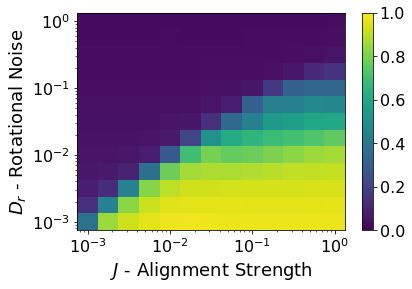

In [16]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=16)
plt.xlabel(r'$J$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Flocking Order Parameter', fontsize=22, pad=12)
#save_fig_pdf(os.path.join(save_folder_base,'slide_1_flocking.pdf'))
plt.show()

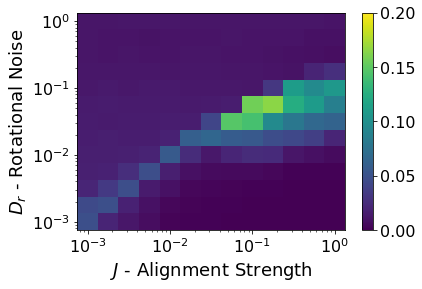

In [17]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('dir_cross_vel_norm', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.2)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=16)
plt.xlabel(r'$J$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Aster Parameter', fontsize=22, pad=12)
#save_fig_pdf(os.path.join(save_folder_base,'slide_1_aster.pdf'))
plt.show()

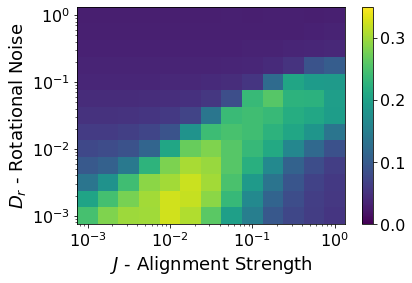

In [22]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.35)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=16)
plt.xlabel(r'$J$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#lt.title('Density Standard Deviation', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'slide_1_density.png'))
plt.show()

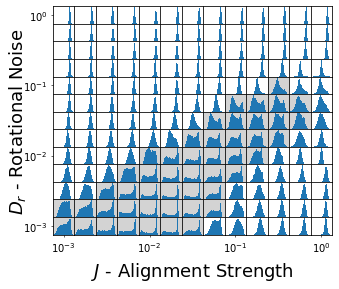

In [13]:
#Plot For Single Group of Simulations
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)

J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)

fig, axs = plt.subplots( 13,13, figsize = (5, 4.2))
fig.subplots_adjust(hspace=0, wspace=0)
#fig.suptitle(rf'Density Histograms', fontsize = 22)

for J_index, J in enumerate(J_vals):
    for Dr_index, Dr in enumerate(Dr_vals):
        #Load data
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data')
        with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
            local_packing_fraction = np.load(local_packing_file)
        mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
        bin_edges = edges_from_centers_linear(bin_centers)
        y, _, _ = axs[-Dr_index-1, J_index].hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
        if std_dev > 0.2:
            axs[-Dr_index-1, J_index].set_facecolor('lightgrey')
        #Set Labels
        if J_index == 0 and Dr_index == 6:
            axs[-Dr_index-1, J_index].set_ylabel(r'$D_r$'+' - Rotational Noise \n', fontsize=18)
        if J_index == 6 and Dr_index == 0:
            axs[-Dr_index-1, J_index].set_xlabel('\n'+r'$J$ - Alignment Strength', fontsize=18)
        #Set tick mars
        axs[-Dr_index-1, J_index].set_xticks([])
        axs[-Dr_index-1, J_index].set_yticks([])
        if J_index == 0:
            min_y, max_y = axs[-Dr_index-1, J_index].get_ylim()
            center_y = (max_y+min_y)/2
            #use scientific notation
            if Dr_index == 0: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-3}$'], minor=True)
            elif Dr_index == 4: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-2}$'], minor=True)
            elif Dr_index == 8: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-1}$'], minor=True)
            elif Dr_index == 12: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{0}$'], minor=True)
        elif Dr_index == 0:
            min_x, max_x = axs[-Dr_index-1, J_index].get_xlim()
            center_x = (max_x+min_x)/2
            #use scientific notation
            if J_index == 0: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-3}$'], minor=True)
            elif J_index == 4: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-2}$'], minor=True)
            elif J_index == 8: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-1}$'], minor=True)
            elif J_index == 12: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{0}$'], minor=True)
        if Dr_index == 0 and J_index == 0:
            min_y, max_y = axs[-Dr_index-1, J_index].get_ylim()
            center_y = (max_y+min_y)/2
            min_x, max_x = axs[-Dr_index-1, J_index].get_xlim()
            center_x = (max_x+min_x)/2
            axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
            axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-3}$'], minor=True)
            axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
            axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-3}$'], minor=True)
save_fig_pdf(os.path.join(save_folder_base,'slide_1_density_hist.pdf'))
plt.show()

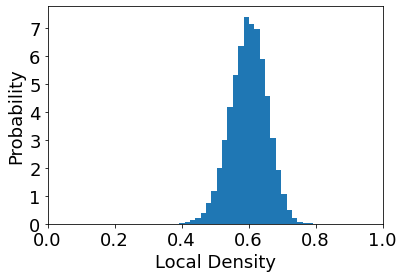

In [24]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
J = J_vals[-1]
Dr  = Dr_vals[0]
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
analysis_data_dir = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data')
with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
    local_packing_fraction = np.load(local_packing_file)
mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
bin_edges = edges_from_centers_linear(bin_centers)

fig, ax = plt.subplots()
y, _, _ = ax.hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
plt.xlabel(r'Local Density', fontsize=18)
plt.ylabel(r'Probability', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title('Flocking Order Parameter', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'flock_density_hist.pdf'))
plt.xlim(0,1)
plt.show()

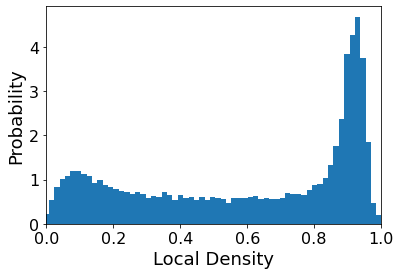

In [21]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
J = J_vals[4]
Dr  = Dr_vals[0]
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
analysis_data_dir = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data')
with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
    local_packing_fraction = np.load(local_packing_file)
mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
bin_edges = edges_from_centers_linear(bin_centers)

fig, ax = plt.subplots()
y, _, _ = ax.hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
plt.xlabel(r'Local Density', fontsize=18)
plt.ylabel(r'Probability', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 1)
#plt.title('Flocking Order Parameter', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'ps_density_hist.pdf'))
plt.show()

# Force Alignment

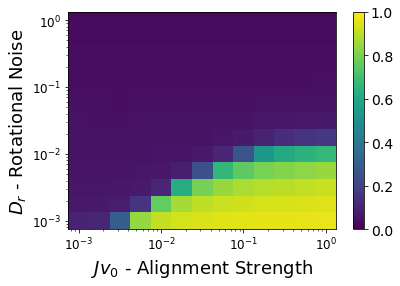

In [5]:
load_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
Jv_vals = np.logspace(-3, 0, num=13)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'$Jv_0$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Flocking Order Parameter', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'slide_2_flocking.pdf'))
plt.show()

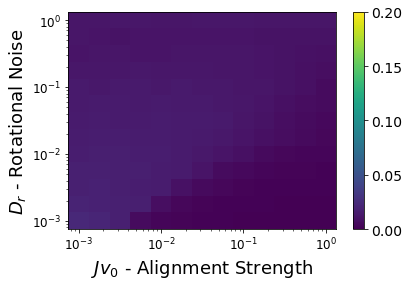

In [6]:
load_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
Jv_vals = np.logspace(-3, 0, num=13)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('dir_cross_vel_norm', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.2)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'$Jv_0$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Aster Parameter', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'slide_2_aster.pdf'))
plt.show()

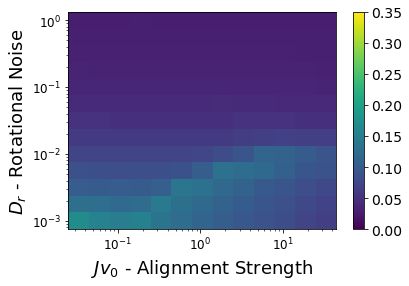

In [7]:
load_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
Jv_vals = np.logspace(-3, 0, num=13)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.35)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'$Jv_0$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#lt.title('Density Standard Deviation', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'slide_2_density.pdf'))
plt.show()

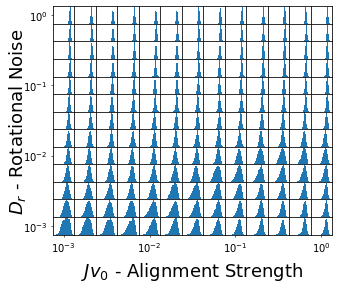

In [12]:
#Plot For Single Group of Simulations
load_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)

Jv_vals = np.logspace(-3, 0, num=13)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=13)

fig, axs = plt.subplots( 13,13, figsize = (5, 4.2))
fig.subplots_adjust(hspace=0, wspace=0)
#fig.suptitle(rf'Density Histograms', fontsize = 22)

for J_index, Jv in enumerate(Jv_vals):
    for Dr_index, Dr in enumerate(Dr_vals):
        #Load data
        J = Jv/v0
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data')
        with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
            local_packing_fraction = np.load(local_packing_file)
        mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
        bin_edges = edges_from_centers_linear(bin_centers)
        y, _, _ = axs[-Dr_index-1, J_index].hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
        if std_dev > 0.2:
            axs[-Dr_index-1, J_index].set_facecolor('lightgrey')
        #Set Labels
        if J_index == 0 and Dr_index == 6:
            axs[-Dr_index-1, J_index].set_ylabel(r'$D_r$'+' - Rotational Noise \n', fontsize=18)
        if J_index == 6 and Dr_index == 0:
            axs[-Dr_index-1, J_index].set_xlabel('\n'+r'$Jv_0$ - Alignment Strength', fontsize=18)
        #Set tick mars
        axs[-Dr_index-1, J_index].set_xticks([])
        axs[-Dr_index-1, J_index].set_yticks([])
        if J_index == 0:
            min_y, max_y = axs[-Dr_index-1, J_index].get_ylim()
            center_y = (max_y+min_y)/2
            #use scientific notation
            if Dr_index == 0: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-3}$'], minor=True)
            elif Dr_index == 4: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-2}$'], minor=True)
            elif Dr_index == 8: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-1}$'], minor=True)
            elif Dr_index == 12: 
                axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
                axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{0}$'], minor=True)
        elif Dr_index == 0:
            min_x, max_x = axs[-Dr_index-1, J_index].get_xlim()
            center_x = (max_x+min_x)/2
            #use scientific notation
            if J_index == 0: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-3}$'], minor=True)
            elif J_index == 4: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-2}$'], minor=True)
            elif J_index == 8: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-1}$'], minor=True)
            elif J_index == 12: 
                axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
                axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{0}$'], minor=True)
        if Dr_index == 0 and J_index == 0:
            min_y, max_y = axs[-Dr_index-1, J_index].get_ylim()
            center_y = (max_y+min_y)/2
            min_x, max_x = axs[-Dr_index-1, J_index].get_xlim()
            center_x = (max_x+min_x)/2
            axs[-Dr_index-1, J_index].set_xticks([center_x], minor=True)
            axs[-Dr_index-1, J_index].set_xticklabels([r'$10^{-3}$'], minor=True)
            axs[-Dr_index-1, J_index].set_yticks([center_y], minor=True)
            axs[-Dr_index-1, J_index].set_yticklabels([r'$10^{-3}$'], minor=True)
save_fig_pdf(os.path.join(save_folder_base,'slide_2_density_hist.pdf'))
plt.show()

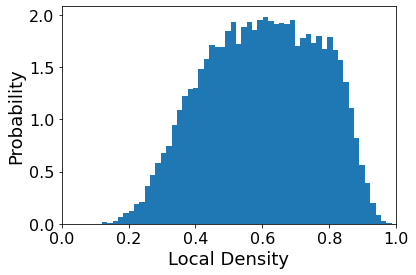

In [32]:
load_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
Jv_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
Jv = Jv_vals[0]
J = Jv/v0
Dr  = Dr_vals[0]
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
analysis_data_dir = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data')
with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
    local_packing_fraction = np.load(local_packing_file)
mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
bin_edges = edges_from_centers_linear(bin_centers)

fig, ax = plt.subplots()
y, _, _ = ax.hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
plt.xlabel(r'Local Density', fontsize=18)
plt.ylabel(r'Probability', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 1)
plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0])
#plt.title('Flocking Order Parameter', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'fluctuation_density_hist.pdf'))
plt.show()

# Dot Plots:

In [73]:
vicsek_values = []
velocity_vicsek_values = []
dir_cross_vel_norm_values = []
packing_std_dev_values = []

phi_values = []
v0_values = []
J_values = []
Dr_values = []
save_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"
for phi in [0.6]:
    for v0 in [0.01, 0.03, 0.1]:
        J_vals = np.logspace(-3, 0, num=4)
        Dr_vals = np.logspace(-3, 0, num=4)
        for J in J_vals:
            for Dr in Dr_vals:
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'new_single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                velocity_vicsek_values.append(single_stats['velocity_vicsek_param'])
                dir_cross_vel_norm_values.append(single_stats['dir_cross_vel_norm'])
                packing_std_dev_values.append(single_stats['packing_std_dev'])
                
                phi_values.append(phi)
                v0_values.append(v0)
                J_values.append(J)
                Dr_values.append(Dr)

save_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
for phi in [0.6]:
    for v0 in [0.01, 0.03]:
        for J in np.logspace(-3, 0, num=13):
            for Dr in np.logspace(-3, 0, num=13):
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'new_single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                velocity_vicsek_values.append(single_stats['velocity_vicsek_param'])
                dir_cross_vel_norm_values.append(single_stats['dir_cross_vel_norm'])
                packing_std_dev_values.append(single_stats['packing_std_dev'])
                
                phi_values.append(phi)
                v0_values.append(v0)
                J_values.append(J)
                Dr_values.append(Dr)

vicsek_values = np.array(vicsek_values)
velocity_vicsek_values = np.array(velocity_vicsek_values)
dir_cross_vel_norm_values = np.array(dir_cross_vel_norm_values)
packing_std_dev_values = np.array(packing_std_dev_values)
phi_values = np.array(phi_values)
v0_values = np.array(v0_values)
J_values = np.array(J_values)
Dr_values = np.array(Dr_values)

data_points_x = J_values/ Dr_values
data_points_y = v0_values / Dr_values
len(data_points_x)

386

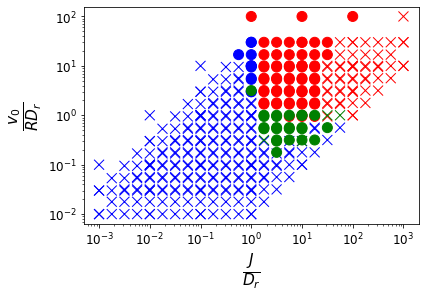

In [75]:
def mscatter(x,y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

fig, axs = plt.subplots()#plt.subplots(figsize=(8,7))
alpha = 1
size = 100

#Add noise
data_points_x_noise = data_points_x #* np.random.normal(1, 0.05, data_points_x.shape)
data_points_y_noise = data_points_y #* np.random.normal(1, 0.05, data_points_y.shape)

#Determine phase separation
phase_separated_cutoff = 0.2
markers = np.where(packing_std_dev_values >= phase_separated_cutoff, 'o', 'x')

#Determine dir cross vel norm vortices

dir_cross_vel_cutoff = 0.1
vortex_condition = dir_cross_vel_norm_values >= dir_cross_vel_cutoff
vortex_x = data_points_x_noise[vortex_condition]
vortex_y = data_points_y_noise[vortex_condition]
vortex_markers = list(markers[vortex_condition])

#Determine flocking
vicsek_cutoff = 0.5
flocking_condition = np.logical_and(velocity_vicsek_values >= vicsek_cutoff, dir_cross_vel_norm_values < dir_cross_vel_cutoff)
flock_x = data_points_x_noise[flocking_condition]
flock_y = data_points_y_noise[flocking_condition]
flock_markers = list(markers[flocking_condition])

#Determine not flocking
not_flocking_condition = np.logical_and(velocity_vicsek_values < vicsek_cutoff, dir_cross_vel_norm_values < dir_cross_vel_cutoff)
not_flock_x = data_points_x_noise[not_flocking_condition]
not_flock_y = data_points_y_noise[not_flocking_condition]
not_flock_markers = list(markers[not_flocking_condition])

#Make Plot
mscatter(flock_x, flock_y, c='red', label='flocking', alpha=alpha, m=flock_markers, s=size)
mscatter(not_flock_x, not_flock_y, c='blue', label='not flocking', alpha=alpha, m=not_flock_markers, s=size)
mscatter(vortex_x, vortex_y, c='green', label='vortex', alpha=alpha, m=vortex_markers, s=size)

plt.xscale('log')
plt.yscale('log')
#plt.legend(fontsize=18)
plt.xlabel(r'$\frac{J}{D_r}$', fontsize=22)
plt.ylabel(r'$\frac{v_0}{R D_r}$', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'slide_dots_vicsek=0.6.pdf'))

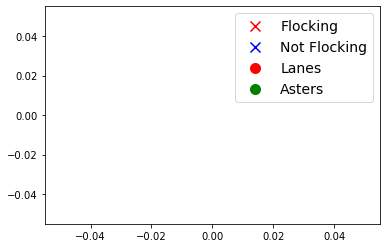

In [76]:
fig, axs = plt.subplots()
plt.scatter([], [], c='red', marker='x', s=100, label='Flocking')
plt.scatter([], [], c='blue', marker='x', s=100, label='Not Flocking')
plt.scatter([], [], c='red', marker='o', s=100, label='Lanes')
plt.scatter([], [], c='green', marker='o', s=100, label='Asters')
plt.legend(fontsize=14)
save_fig_pdf(os.path.join(save_folder_base,'first_dots_legend.pdf'))
plt.show()

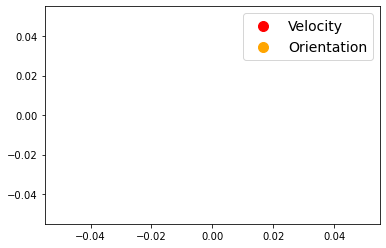

In [85]:
fig, axs = plt.subplots()
plt.scatter([], [], c='red', marker='o', s=100, label='Velocity')
plt.scatter([], [], c='orange', marker='o', s=100, label='Orientation')
plt.legend(fontsize=14)
save_fig_pdf(os.path.join(save_folder_base,'simulation_legend.pdf'))
plt.show()

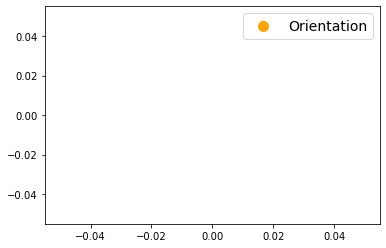

In [86]:
fig, axs = plt.subplots()
plt.scatter([], [], c='orange', marker='o', s=100, label='Orientation')
plt.legend(fontsize=14)
save_fig_pdf(os.path.join(save_folder_base,'aster_simulation_legend.pdf'))
plt.show()

In [68]:
vicsek_values = []
velocity_vicsek_values = []
dir_cross_vel_norm_values = []
packing_std_dev_values = []

phi_values = []
v0_values = []
J_values = []
Dr_values = []
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
for phi in [0.6]:
    for v0 in [0.01, 0.03, 0.1]:
        Jv_vals = np.logspace(-3, 0, num=4)
        J_vals = Jv_vals / v0
        Dr_vals = np.logspace(-3, 0, num=4)
        for J in J_vals:
            for Dr in Dr_vals:
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'new_single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                velocity_vicsek_values.append(single_stats['velocity_vicsek_param'])
                dir_cross_vel_norm_values.append(single_stats['dir_cross_vel_norm'])
                packing_std_dev_values.append(single_stats['packing_std_dev'])
                
                phi_values.append(phi)
                v0_values.append(v0)
                J_values.append(J)
                Dr_values.append(Dr)

save_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
for phi in [0.6]:
    for v0 in [0.01, 0.03]:
        for Jv in np.logspace(-3, 0, num=13):
            for Dr in np.logspace(-3, 0, num=13):
                J = Jv/v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'new_single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                velocity_vicsek_values.append(single_stats['velocity_vicsek_param'])
                dir_cross_vel_norm_values.append(single_stats['dir_cross_vel_norm'])
                packing_std_dev_values.append(single_stats['packing_std_dev'])
                
                phi_values.append(phi)
                v0_values.append(v0)
                J_values.append(J)
                Dr_values.append(Dr)

vicsek_values = np.array(vicsek_values)
velocity_vicsek_values = np.array(velocity_vicsek_values)
dir_cross_vel_norm_values = np.array(dir_cross_vel_norm_values)
packing_std_dev_values = np.array(packing_std_dev_values)
phi_values = np.array(phi_values)
v0_values = np.array(v0_values)
J_values = np.array(J_values)
Dr_values = np.array(Dr_values)

data_points_x = J_values*v0_values/ Dr_values
data_points_y = v0_values / Dr_values
len(data_points_x)

386

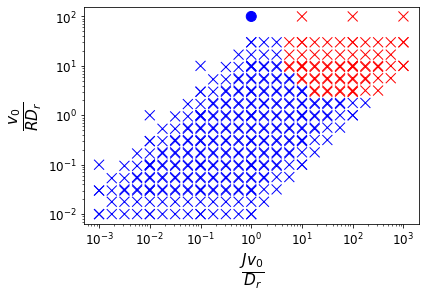

In [72]:
def mscatter(x,y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

fig, axs = plt.subplots()#plt.subplots(figsize=(8,7))
alpha = 1
size = 100

#Add noise
data_points_x_noise = data_points_x #* np.random.normal(1, 0.05, data_points_x.shape)
data_points_y_noise = data_points_y #* np.random.normal(1, 0.05, data_points_y.shape)

#Determine phase separation
phase_separated_cutoff = 0.2
markers = np.where(packing_std_dev_values >= phase_separated_cutoff, 'o', 'x')

#Determine dir cross vel norm vortices

dir_cross_vel_cutoff = 0.1
vortex_condition = dir_cross_vel_norm_values >= dir_cross_vel_cutoff
vortex_x = data_points_x_noise[vortex_condition]
vortex_y = data_points_y_noise[vortex_condition]
vortex_markers = list(markers[vortex_condition])

#Determine flocking
vicsek_cutoff = 0.5
flocking_condition = np.logical_and(velocity_vicsek_values >= vicsek_cutoff, dir_cross_vel_norm_values < dir_cross_vel_cutoff)
flock_x = data_points_x_noise[flocking_condition]
flock_y = data_points_y_noise[flocking_condition]
flock_markers = list(markers[flocking_condition])

#Determine not flocking
not_flocking_condition = np.logical_and(velocity_vicsek_values < vicsek_cutoff, dir_cross_vel_norm_values < dir_cross_vel_cutoff)
not_flock_x = data_points_x_noise[not_flocking_condition]
not_flock_y = data_points_y_noise[not_flocking_condition]
not_flock_markers = list(markers[not_flocking_condition])

#Make Plot
mscatter(vortex_x, vortex_y, c='green', label='vortex', alpha=alpha, m=vortex_markers, s=size)
mscatter(flock_x, flock_y, c='red', label='flocking', alpha=alpha, m=flock_markers, s=size)
mscatter(not_flock_x, not_flock_y, c='blue', label='not flocking', alpha=alpha, m=not_flock_markers, s=size)

#Make empty plots for legend
plt.scatter([], [], c='black', marker='o', alpha=alpha, s=size, label='phase separated')
plt.scatter([], [], c='black', marker='x', alpha=alpha, s=size, label='not phase separated')

plt.xscale('log')
plt.yscale('log')
#plt.legend(fontsize=18)
plt.xlabel(r'$\frac{Jv_0}{D_r}$', fontsize=22)
plt.ylabel(r'$\frac{v_0}{R D_r}$', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'slide_dots_force=0.6.pdf'))

# Plot MSD

In [39]:
from sklearn.linear_model import LinearRegression

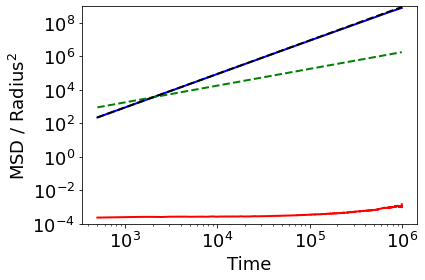

In [81]:
times = np.linspace(0, 1e6, num=2000)[1:]
load_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
J = J_vals[-1]
Dr = Dr_vals[0]
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)

msd_normal_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal.npy')
msd_minus_flock_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal_minus_avg.npy')
with open(msd_normal_filename, 'rb') as msd_normal_file:
    msd_normal = np.load(msd_normal_file)
with open(msd_minus_flock_filename, 'rb') as msd_minus_flock_file:
    msd_minus_flock = np.load(msd_minus_flock_file)

#Make plot
fig, ax = plt.subplots()
ax.plot(times, msd_normal, color='blue', label='MSD', linewidth=2)
ax.plot(times, msd_minus_flock, color='red', label='MSD Minus Flock', linewidth=2)
#Plot slope 1 line
slope_1_line = 2*(v0**2 / Dr)*times
ax.plot(times, slope_1_line, color='green', linestyle='--', label='Diffusive', linewidth=2)
#plot slope 2
slope_2_line = v0**2 * times**2
ax.plot(times, slope_2_line, color='black', linestyle='--', label='Ballistic', linewidth=2)
ax.set_ylim(1e-4, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Time', fontsize=18)
plt.ylabel(r'MSD / Radius$^2$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
save_fig_pdf(os.path.join(save_folder_base,'high_density_solid_msd.pdf'))
plt.show()


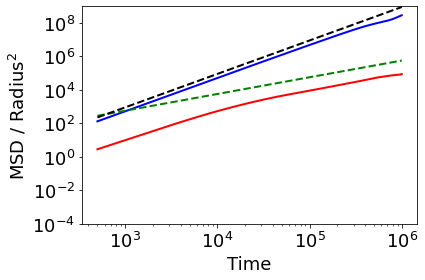

In [82]:
times = np.linspace(0, 1e6, num=2000)[1:]
load_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
J = J_vals[1]
Dr = Dr_vals[1]
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)

msd_normal_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal.npy')
msd_minus_flock_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal_minus_avg.npy')
with open(msd_normal_filename, 'rb') as msd_normal_file:
    msd_normal = np.load(msd_normal_file)
with open(msd_minus_flock_filename, 'rb') as msd_minus_flock_file:
    msd_minus_flock = np.load(msd_minus_flock_file)

#Make plot
fig, ax = plt.subplots()
ax.plot(times, msd_normal, color='blue', label='MSD', linewidth=2)
ax.plot(times, msd_minus_flock, color='red', label='MSD Minus Flock', linewidth=2)
#Plot slope 1 line
slope_1_line = 2*(v0**2 / Dr)*times
ax.plot(times, slope_1_line, color='green', linestyle='--', label='Diffusive', linewidth=2)
#Plot slope 2 line
slope_2_line = v0**2 * times**2
ax.plot(times, slope_2_line, color='black', linestyle='--', label='Ballistic', linewidth=2)
ax.set_ylim(1e-4, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Time', fontsize=18)
plt.ylabel(r'MSD / Radius$^2$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.legend(fontsize=18)
#lt.title('Density Standard Deviation', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'high_density_liquid_msd.pdf'))
plt.show()

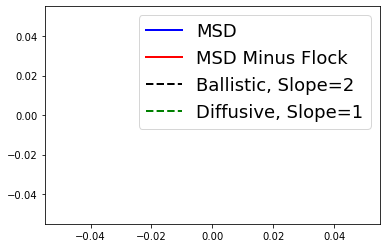

In [84]:
fig, axs = plt.subplots()
plt.plot([], [], c='blue', label='MSD', linewidth=2)
plt.plot([], [], c='red', label='MSD Minus Flock', linewidth=2)
plt.plot([], [], c='black', label='Ballistic, Slope=2', linestyle='--', linewidth=2)
plt.plot([], [], c='green', label='Diffusive, Slope=1', linestyle='--', linewidth=2)
plt.legend(fontsize=18)
save_fig_pdf(os.path.join(save_folder_base,'msd_legend.pdf'))
plt.show()

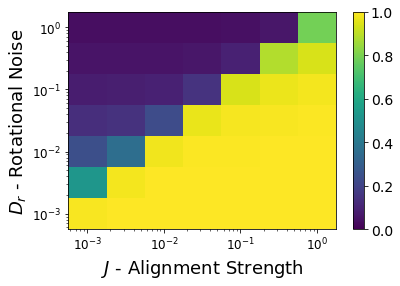

In [52]:
load_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'$J$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Flocking Order Parameter', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'vicsek_phi=1_flocking.pdf'))
plt.show()

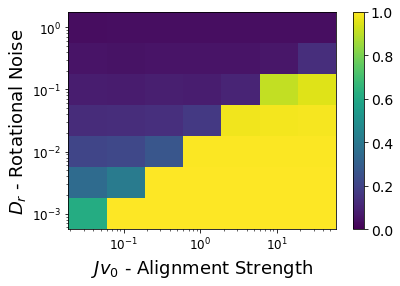

In [53]:
load_dir = "/home/ryanlopez/_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
Jv_vals = np.logspace(-3, 0, num=7)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'$Jv_0$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Flocking Order Parameter', fontsize=22, pad=12)
save_fig_pdf(os.path.join(save_folder_base,'force_phi=1_flocking.pdf'))
plt.show()